In [7]:
from __future__ import unicode_literals, print_function, division

# System imports
import os
import sys
import argparse

# Numerics
import numpy as np
from numpy import ma
from scipy.interpolate import InterpolatedUnivariateSpline
from math import floor

# Plotting
import matplotlib.pyplot as plt
from matplotlib import scale as mscale
from matplotlib.transforms import Transform
from matplotlib.ticker import FixedLocator

# CLASS

from classy import Class

In [8]:
# Creates an instance of CLASS
cosmo = Class()
CLASS_INPUT={}
raw_cl={}

In [9]:
cosmo.struct_cleanup()
cosmo.set_default()
cosmo.compute()
raw_cl['default']=cosmo.raw_cl()
cosmo.struct_cleanup()

In [10]:
data_sets_non_def=('extra_nur','dsg_basic','dsg_nap''dsg_vis')


CLASS_INPUT['extra_nur']={"N_ur":3.351,'output':'tCl'}
CLASS_INPUT['dsg_basic']={'output':'tCl',
                        'dsg_log10a_vals': '-15.,-14.673,-14.347,-14.02,-13.694,-13.367,-13.041,-12.714,-12.388,-12.061,-11.735,-11.408,-11.082,-10.755,-10.429,-10.102,-9.7755,-9.449,-9.1224,-8.7959,-8.4694,-8.1429,-7.8163,-7.4898,-7.1633,-6.8367,-6.5102,-6.1837,-5.8571,-5.5306,-5.2041,-4.8776,-4.551,-4.2245,-3.898,-3.5714,-3.2449,-2.9184,-2.5918,-2.2653,-1.9388,-1.6122,-1.2857,-0.95918,-0.63265,-0.30612,0.020408,0.34694,0.67347,1.',
                        'dsg_w_vals':  '0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333',
                        'dsg_alpha' : 0.00001200901405
                       }
CLASS_INPUT['dsg_nap']={'output':'tCl',
                        'nap' : 'y',
                        'dsg_c_eff2':0.3333333333,
                        'dsg_log10a_vals': '-15.,-14.673,-14.347,-14.02,-13.694,-13.367,-13.041,-12.714,-12.388,-12.061,-11.735,-11.408,-11.082,-10.755,-10.429,-10.102,-9.7755,-9.449,-9.1224,-8.7959,-8.4694,-8.1429,-7.8163,-7.4898,-7.1633,-6.8367,-6.5102,-6.1837,-5.8571,-5.5306,-5.2041,-4.8776,-4.551,-4.2245,-3.898,-3.5714,-3.2449,-2.9184,-2.5918,-2.2653,-1.9388,-1.6122,-1.2857,-0.95918,-0.63265,-0.30612,0.020408,0.34694,0.67347,1.',
                        'dsg_w_vals':  '0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333',
                        'dsg_alpha' : 0.00001200901405
                       }
CLASS_INPUT['dsg_vis']={'output':'tCl',
                        'dsg_c_vis2':0.3333333333,
                        'nap' : 'y',
                        'dsg_c_eff2':0.3333333333,
                        'dsg_log10a_vals': '-15.,-14.673,-14.347,-14.02,-13.694,-13.367,-13.041,-12.714,-12.388,-12.061,-11.735,-11.408,-11.082,-10.755,-10.429,-10.102,-9.7755,-9.449,-9.1224,-8.7959,-8.4694,-8.1429,-7.8163,-7.4898,-7.1633,-6.8367,-6.5102,-6.1837,-5.8571,-5.5306,-5.2041,-4.8776,-4.551,-4.2245,-3.898,-3.5714,-3.2449,-2.9184,-2.5918,-2.2653,-1.9388,-1.6122,-1.2857,-0.95918,-0.63265,-0.30612,0.020408,0.34694,0.67347,1.',
                        'dsg_w_vals':  '0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333',
                        'dsg_alpha' : 0.00001200901405
                       }


In [12]:
for data_set in data_sets_non_def:
    cosmo.struct_cleanup()                       
    cosmo.set(CLASS_INPUT[data_set])
    cosmo._fillparfile()
    cosmo.compute()
    raw_cl[data_set]=cosmo.raw_cl()

cosmo.struct_cleanup()    

KeyError: u'dsg_napdsg_vis'

In [4]:
k_vals=raw_cl['default']['ell'][2:]
cl={}
for name in data_sets:
    cl[name]=raw_cl[name]['tt'][2:]

In [5]:
cl_ratio={}
for name in data_sets:
    cl_ratio[name]=cl[name]/cl['default']-1

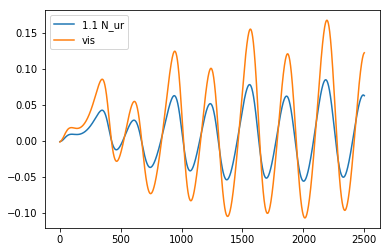

In [6]:
plt.plot(k_vals,cl_ratio['extra_nur'],k_vals,cl_ratio['dsg_nur'])
plt.legend(("1.1 N_ur","vis"))

In [7]:
cl['dsg_nur']

array([1.56395567e-10, 7.37042266e-11, 4.15698372e-11, ...,
       1.06164187e-17, 1.05671883e-17, 1.05177684e-17])

In [8]:
cl['default']

array([1.56601911e-10, 7.37941899e-11, 4.16142273e-11, ...,
       9.46211901e-18, 9.41637632e-18, 9.37090231e-18])

In [9]:
len(cl0_vals)

NameError: name 'cl0_vals' is not defined

In [ ]:
cl_ratio_nur=cl_nur/cl0_vals-1
cl_ratio_basic=cl_basic/cl0_vals-1
cl_ratio_nap=cl_nap/cl0_vals-1
cl_ratio_vis=cl_vis/cl0_vals-1
cl_ratio_class=cl0class_vals/cl0_vals-1

In [ ]:
plt.plot(k_vals,cl_ratio_nur,k_vals,cl_ratio_basic,k_vals,cl_ratio_nap,k_vals,cl_ratio_vis)
plt.legend(("1.1 N_ur","basic","nap","vis*"))

In [ ]:
plt.plot(k_vals,cl_ratio_class)
plt.legend(("class to Hu."))

In [11]:
?cosmo._fillparfile()